In [ ]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train),(x_test, y_test) = load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


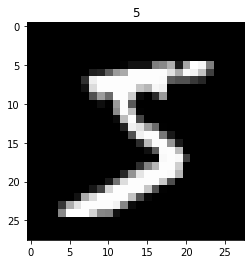

In [ ]:
plt.imshow(x_train[0], cmap="gray")
plt.title(y_train[0])
plt.show()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [ ]:
print(x_train.shape)
print(y_train_ohe.shape)
print(x_test.shape)
print(y_test_ohe.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


### Neural Networks using Tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1L2

In [ ]:
model = Sequential()
model.add(Input(784,))
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.1))
# model.add(Dense(100, activation="relu",kernel_regularizer = L1L2(l1=0, l2=0.3))) # Hiddenlayer with 100 units
# model.add(BatchNormalization())
model.add(Dense(10,"softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics="accuracy")

In [ ]:
model.fit(x=x_train, y=y_train_ohe, validation_data=(x_test, y_test_ohe), epochs=50, batch_size=1000)

Epoch 1/50
60/60 [==============================] - 2s 14ms/step - loss: 0.8692 - accuracy: 0.7679 - val_loss: 0.3604 - val_accuracy: 0.9059
Epoch 2/50
60/60 [==============================] - 1s 10ms/step - loss: 0.3504 - accuracy: 0.9016 - val_loss: 0.2731 - val_accuracy: 0.9234
Epoch 3/50
60/60 [==============================] - 1s 10ms/step - loss: 0.2830 - accuracy: 0.9200 - val_loss: 0.2317 - val_accuracy: 0.9345
Epoch 4/50
60/60 [==============================] - 1s 10ms/step - loss: 0.2404 - accuracy: 0.9324 - val_loss: 0.2023 - val_accuracy: 0.9414
Epoch 5/50
60/60 [==============================] - 1s 12ms/step - loss: 0.2100 - accuracy: 0.9402 - val_loss: 0.1811 - val_accuracy: 0.9473
Epoch 6/50
60/60 [==============================] - 1s 13ms/step - loss: 0.1878 - accuracy: 0.9467 - val_loss: 0.1656 - val_accuracy: 0.9511
Epoch 7/50
60/60 [==============================] - 1s 10ms/step - loss: 0.1701 - accuracy: 0.9520 - val_loss: 0.1515 - val_accuracy: 0.9552
Epoch 8/50
60

In [ ]:
print(model.summary())

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 100)               78500     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 dense_33 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79910 (312.15 KB)
Trainable params: 79710 (311.37 KB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________
None


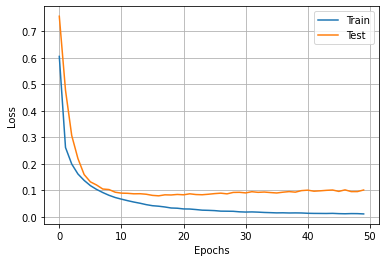

In [ ]:
train_loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.xlabel("Epochs")
plt.ylabel("Loss")
# plt.ylim((0,500))
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

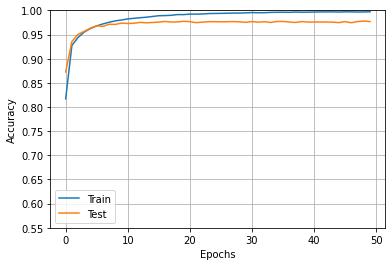

In [ ]:
train_acc = model.history.history["accuracy"]
val_acc = model.history.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.ylim((0.55, 1.0))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

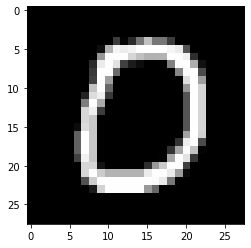

In [ ]:
plt.imshow(x_test[10].reshape(28,28), cmap="gray")
plt.show()

In [ ]:
preds = model.predict(x_test)[10]

313/313 [==============================] - 1s 2ms/step


In [ ]:
import numpy as np
np.argmax(preds.round(3))

0